# IRCTC Stock Market Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib
sns.set(style='whitegrid')
%matplotlib inline

In [3]:
df = pd.read_csv('irctc_stock.csv', parse_dates=['Date'])
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA10,MA20,Vol_MA5,Target
0,2022-01-03,100.50,100.64,99.85,99.97,99.97,2761514,0.000000,97.538,96.539,97.7855,2124315.8,1
1,2022-01-04,101.12,101.71,100.59,100.79,100.79,2120981,0.008202,97.538,96.539,97.7855,2124315.8,0
2,2022-01-05,98.11,98.66,97.11,97.57,97.57,2157123,-0.031948,97.538,96.539,97.7855,2124315.8,0
3,2022-01-06,95.14,95.74,94.57,95.17,95.17,1727808,-0.024598,97.538,96.539,97.7855,2124315.8,0
4,2022-01-07,94.13,94.48,93.57,94.19,94.19,1854153,-0.010297,97.538,96.539,97.7855,2124315.8,0


In [5]:
print('First 5 rows:')
display(df.head())
print('\nDataset info:')
print(df.info())
print('\nSummary statistics:')
display(df.describe().transpose())

First 5 rows:


,Date,Open,High,Low,Close,Adj Close,Volume,Return,MA5,MA10,MA20,Vol_MA5,Target
0,2022-01-03,100.50,100.64,99.85,99.97,99.97,2761514,0.000000,97.538,96.539,97.7855,2124315.8,1
1,2022-01-04,101.12,101.71,100.59,100.79,100.79,2120981,0.008202,97.538,96.539,97.7855,2124315.8,0
2,2022-01-05,98.11,98.66,97.11,97.57,97.57,2157123,-0.031948,97.538,96.539,97.7855,2124315.8,0
3,2022-01-06,95.14,95.74,94.57,95.17,95.17,1727808,-0.024598,97.538,96.539,97.7855,2124315.8,0
4,2022-01-07,94.13,94.48,93.57,94.19,94.19,1854153,-0.010297,97.538,96.539,97.7855,2124315.8,0



Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       800 non-null    datetime64[ns]
 1   Open       800 non-null    float64       
 2   High       800 non-null    float64       
 3   Low        800 non-null    float64       
 4   Close      800 non-null    float64       
 5   Adj Close  800 non-null    float64       
 6   Volume     800 non-null    int64         
 7   Return     800 non-null    float64       
 8   MA5        800 non-null    float64       
 9   MA10       800 non-null    float64       
 10  MA20       800 non-null    float64       
 11  Vol_MA5    800 non-null    float64       
 12  Target     800 non-null    int64         
dtypes: datetime64[ns](1), float64(10), int64(2)
memory usage: 81.4 KB
None

Summary statistics:


,count,mean,min,25%,50%,75%,max,std
Date,800,2023-07-15 12:00:00,2022-01-03 00:00:00,2022-10-09 06:00:00,2023-07-15 12:00:00,2024-04-19 18:00:00,2025-01-24 00:00:00,NaN
Open,800.0,153.2941,93.56,133.4425,155.935,172.8125,214.54,29.621241
High,800.0,154.537688,94.06,134.73,156.965,174.63,215.6,29.860978
Low,800.0,152.1099,92.39,132.5775,154.995,171.7575,213.02,29.362375
Close,800.0,153.350563,94.02,133.2575,155.86,173.085,214.4,29.616749
Adj Close,800.0,153.350563,94.02,133.2575,155.86,173.085,214.4,29.616749
Volume,800.0,2010255.8725,379366.0,1696964.0,2017425.5,2339497.5,3621546.0,489536.634044
Return,800.0,0.000699,-0.033454,-0.008,0.000289,0.008685,0.044057,0.012953
MA5,800.0,153.185765,94.848,133.261,156.015,173.062,213.038,29.699537
MA10,800.0,152.989981,95.815,133.33025,155.8775,172.92875,212.001,29.814887


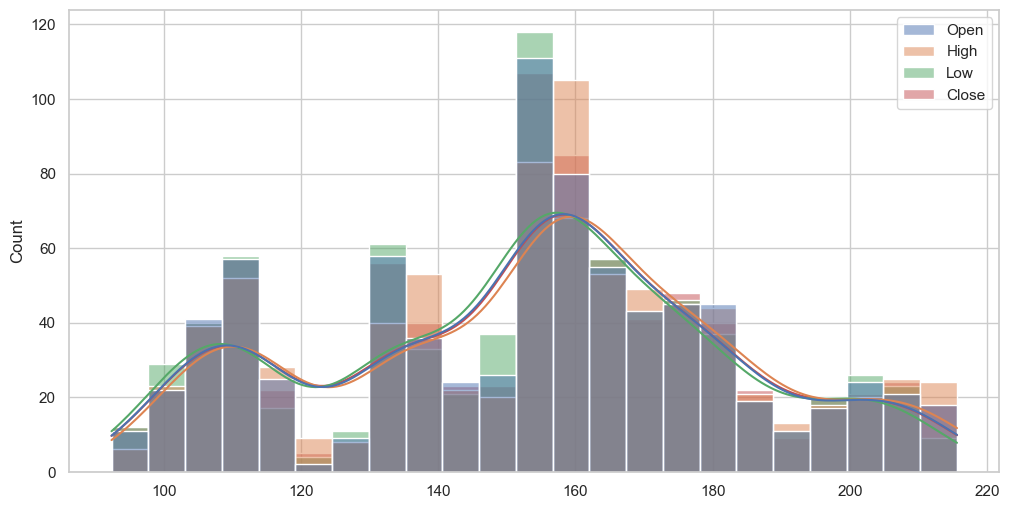

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[['Open','High','Low','Close']], kde=True)
plt.show()

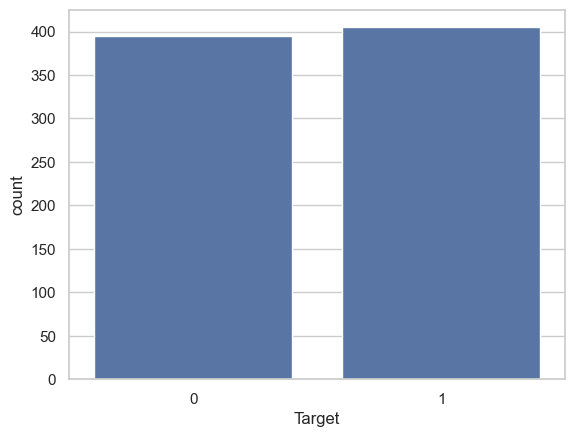

In [9]:
sns.countplot(x='Target', data=df)
plt.show()

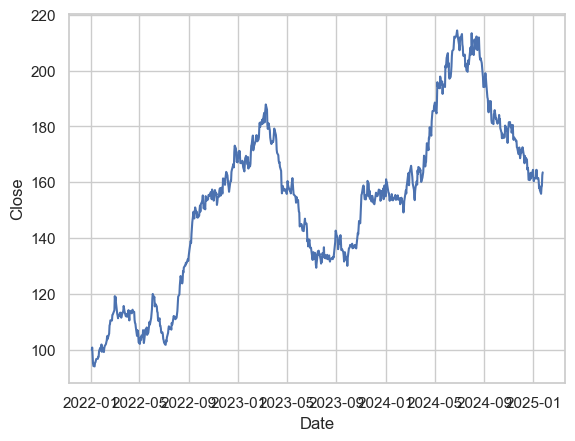

In [11]:
sns.lineplot(x='Date', y='Close', data=df)
plt.show()

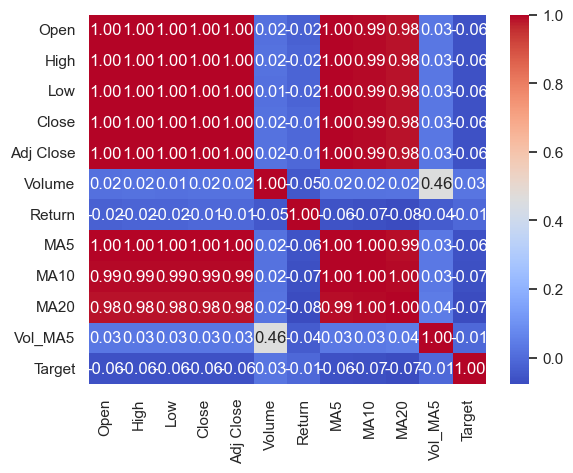

In [13]:
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

In [17]:
features = ['Open','High','Low','Close','Adj Close','Volume','Return','MA5','MA10','MA20','Vol_MA5']
X = df[features]
y = df['Target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)
log_reg.fit(X_train_scaled, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Logistic Regression Accuracy: 0.5
Random Forest Accuracy: 0.51875


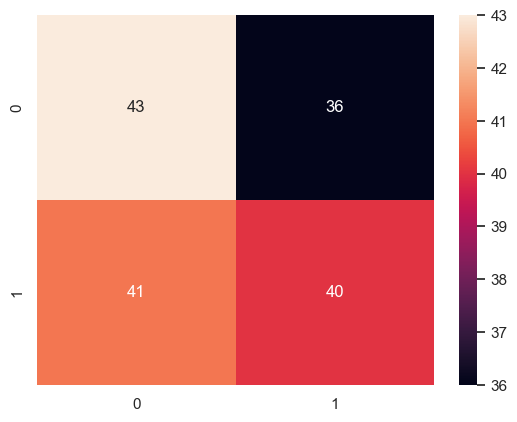

In [23]:
y_pred_log = log_reg.predict(X_test_scaled)
y_pred_rf = rf.predict(X_test)
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred_log))
print('Random Forest Accuracy:', accuracy_score(y_test, y_pred_rf))
cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d')
plt.show()

In [25]:
# Step 9: 💾 Save the trained model and scaler
joblib.dump(rf, 'irctc_rf_model.pkl')
joblib.dump(scaler, 'irctc_scaler.pkl')
print('Model and scaler saved successfully!')

Model and scaler saved successfully!


In [27]:
# Step 10: Load model and scaler & Example prediction
loaded_model = joblib.load('irctc_rf_model.pkl')
loaded_scaler = joblib.load('irctc_scaler.pkl')
sample = X.iloc[-1].values.reshape(1, -1)
sample_scaled = loaded_scaler.transform(sample)
pred = loaded_model.predict(sample)
print('Loaded model prediction (1 = Up, 0 = Down):', pred[0])

Loaded model prediction (1 = Up, 0 = Down): 0


C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
